In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [207]:
dataset=pd.read_csv("Placement_Data_Full_Class01.csv")
dataset2=dataset[:]
print(dataset.shape)
dataset.head()

(215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,NaN,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [208]:

dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,211.000000,215.000000,210.000000,215.000000,148.000000
mean,108.000000,67.303395,66.451801,66.370186,72.169619,62.278186,288655.405405
std,62.209324,10.827205,10.931568,7.358743,13.374233,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,61.000000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,84.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           211 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         210 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [210]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,4
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [211]:
dataset.axes

[RangeIndex(start=0, stop=215, step=1),
 Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
        'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
        'status', 'salary'],
       dtype='object')]

In [212]:
nc=len(dataset.axes[1])
for i in dataset.axes[1]:
    print(i)
#   print("i is ",dataset.axes[i])
# dataset[''].unique()

sl_no
gender
ssc_p
ssc_b
hsc_p
hsc_b
hsc_s
degree_p
degree_t
workex
etest_p
specialisation
mba_p
status
salary


In [213]:
dataset.nunique(axis=0)

,0
sl_no,215
gender,2
ssc_p,103
ssc_b,2
hsc_p,95
hsc_b,2
hsc_s,3
degree_p,89
degree_t,3
workex,2


<h3>Extracting categorical values' index</h3>

In [214]:
categorical_att=dataset.dtypes[dataset.dtypes=='object'].index
categorical_att

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

<h3>Attributes with categorical values</h3>

In [215]:
for i in categorical_att:
    print(i,' :   ',dataset[i].unique())

gender  :    ['M' 'F']
ssc_b  :    ['Others' 'Central']
hsc_b  :    ['Others' 'Central']
hsc_s  :    ['Commerce' 'Science' 'Arts']
degree_t  :    ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex  :    ['No' 'Yes']
specialisation  :    ['Mkt&HR' 'Mkt&Fin']
status  :    ['Placed' 'Not Placed']


<h3>Attributes with continuous values</h3>

In [216]:
continuous_att=dataset.dtypes[dataset.dtypes!='object'].index
continuous_att

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

<h3>Tranforming objects variables on numbers</h3>

In [217]:
encoder = LabelEncoder()
for i in categorical_att:
    dataset[i] = encoder.fit_transform(dataset[i])
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,NaN,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


Tranformed objects variables on numbers

<h3>Filling missing values</h3>

In [218]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,4
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


missing values in salary, hcp_p and etest_p

<h4>Analysing dependency between status and salary</h4>

In [219]:
for (i,j,k) in zip(dataset['status'],dataset['salary'],dataset['sl_no']):
    if(i==0 and (pd.isna(j))==False):
        print(k,"th row")
    elif(i==1 and (pd.isna(j))==True):
        print(k,"th row")

now we have ensured that column status correctly flags if student is placed or not
if status =1
then student is placed and will definitely have non-zero number in salary column
if status =0
then student is not placed and will definitely have NaN/null value in salary column


In [220]:
dataset=dataset.fillna(value={'salary':0})
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,NaN,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


<h4>feature reduction</h4>
    Now that we know that status of placement can be displayed by salary column alone, so we will drop the attribute 'status'
    and 'salary' attribute will show 0 salary for unplaced student.<br>
    We will remove sl_no too.

In [221]:
dst1=dataset.drop(['status','sl_no'],axis=1)
print(dst1.shape)
dst1.head()

(215, 13)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,NaN,1,59.43,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0


now we are left with only 13 attributes

now only the missing values in hcp_p and etest_p are left to be filled.<br>
To fill hsc_p and etest_p we will have to find skewness of these two attributes.

<h5>Skewness of attributes</h5>

In [222]:
dataset_tmp=dataset2.drop(['status','sl_no'],axis=1)
continuous_att=dataset_tmp.dtypes[dataset_tmp.dtypes!='object'].index
skew_feats=dataset_tmp[continuous_att].skew()
skew_feats

,0
ssc_p,-0.132649
hsc_p,0.149938
degree_p,0.244917
etest_p,0.272502
mba_p,0.313576
salary,3.569747


Since attributes with missing values do not have skewness, we will fill missing values of these attributes with mean (if attributes were skewed we would go for mode value of these attributes)

In [223]:
dst2=dst1.fillna(value={'etest_p':dst1['etest_p'].mean()})
dst2['etest_p']=dst2['etest_p'].round(1)

In [224]:
dst3=dst2.fillna(value={'hsc_p':dst2['hsc_p'].mean()})
dst3['hsc_p']=dst3['hsc_p'].round(1)

In [225]:
dst3.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,91.0,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,0,78.3,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,0,68.0,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,1,56.00,0,52.0,0,2,52.00,2,0,72.2,1,59.43,0.0
4,1,85.80,0,73.6,0,1,73.30,0,0,96.8,0,55.50,425000.0


In [226]:
dst3.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


Now, dataset have no null values

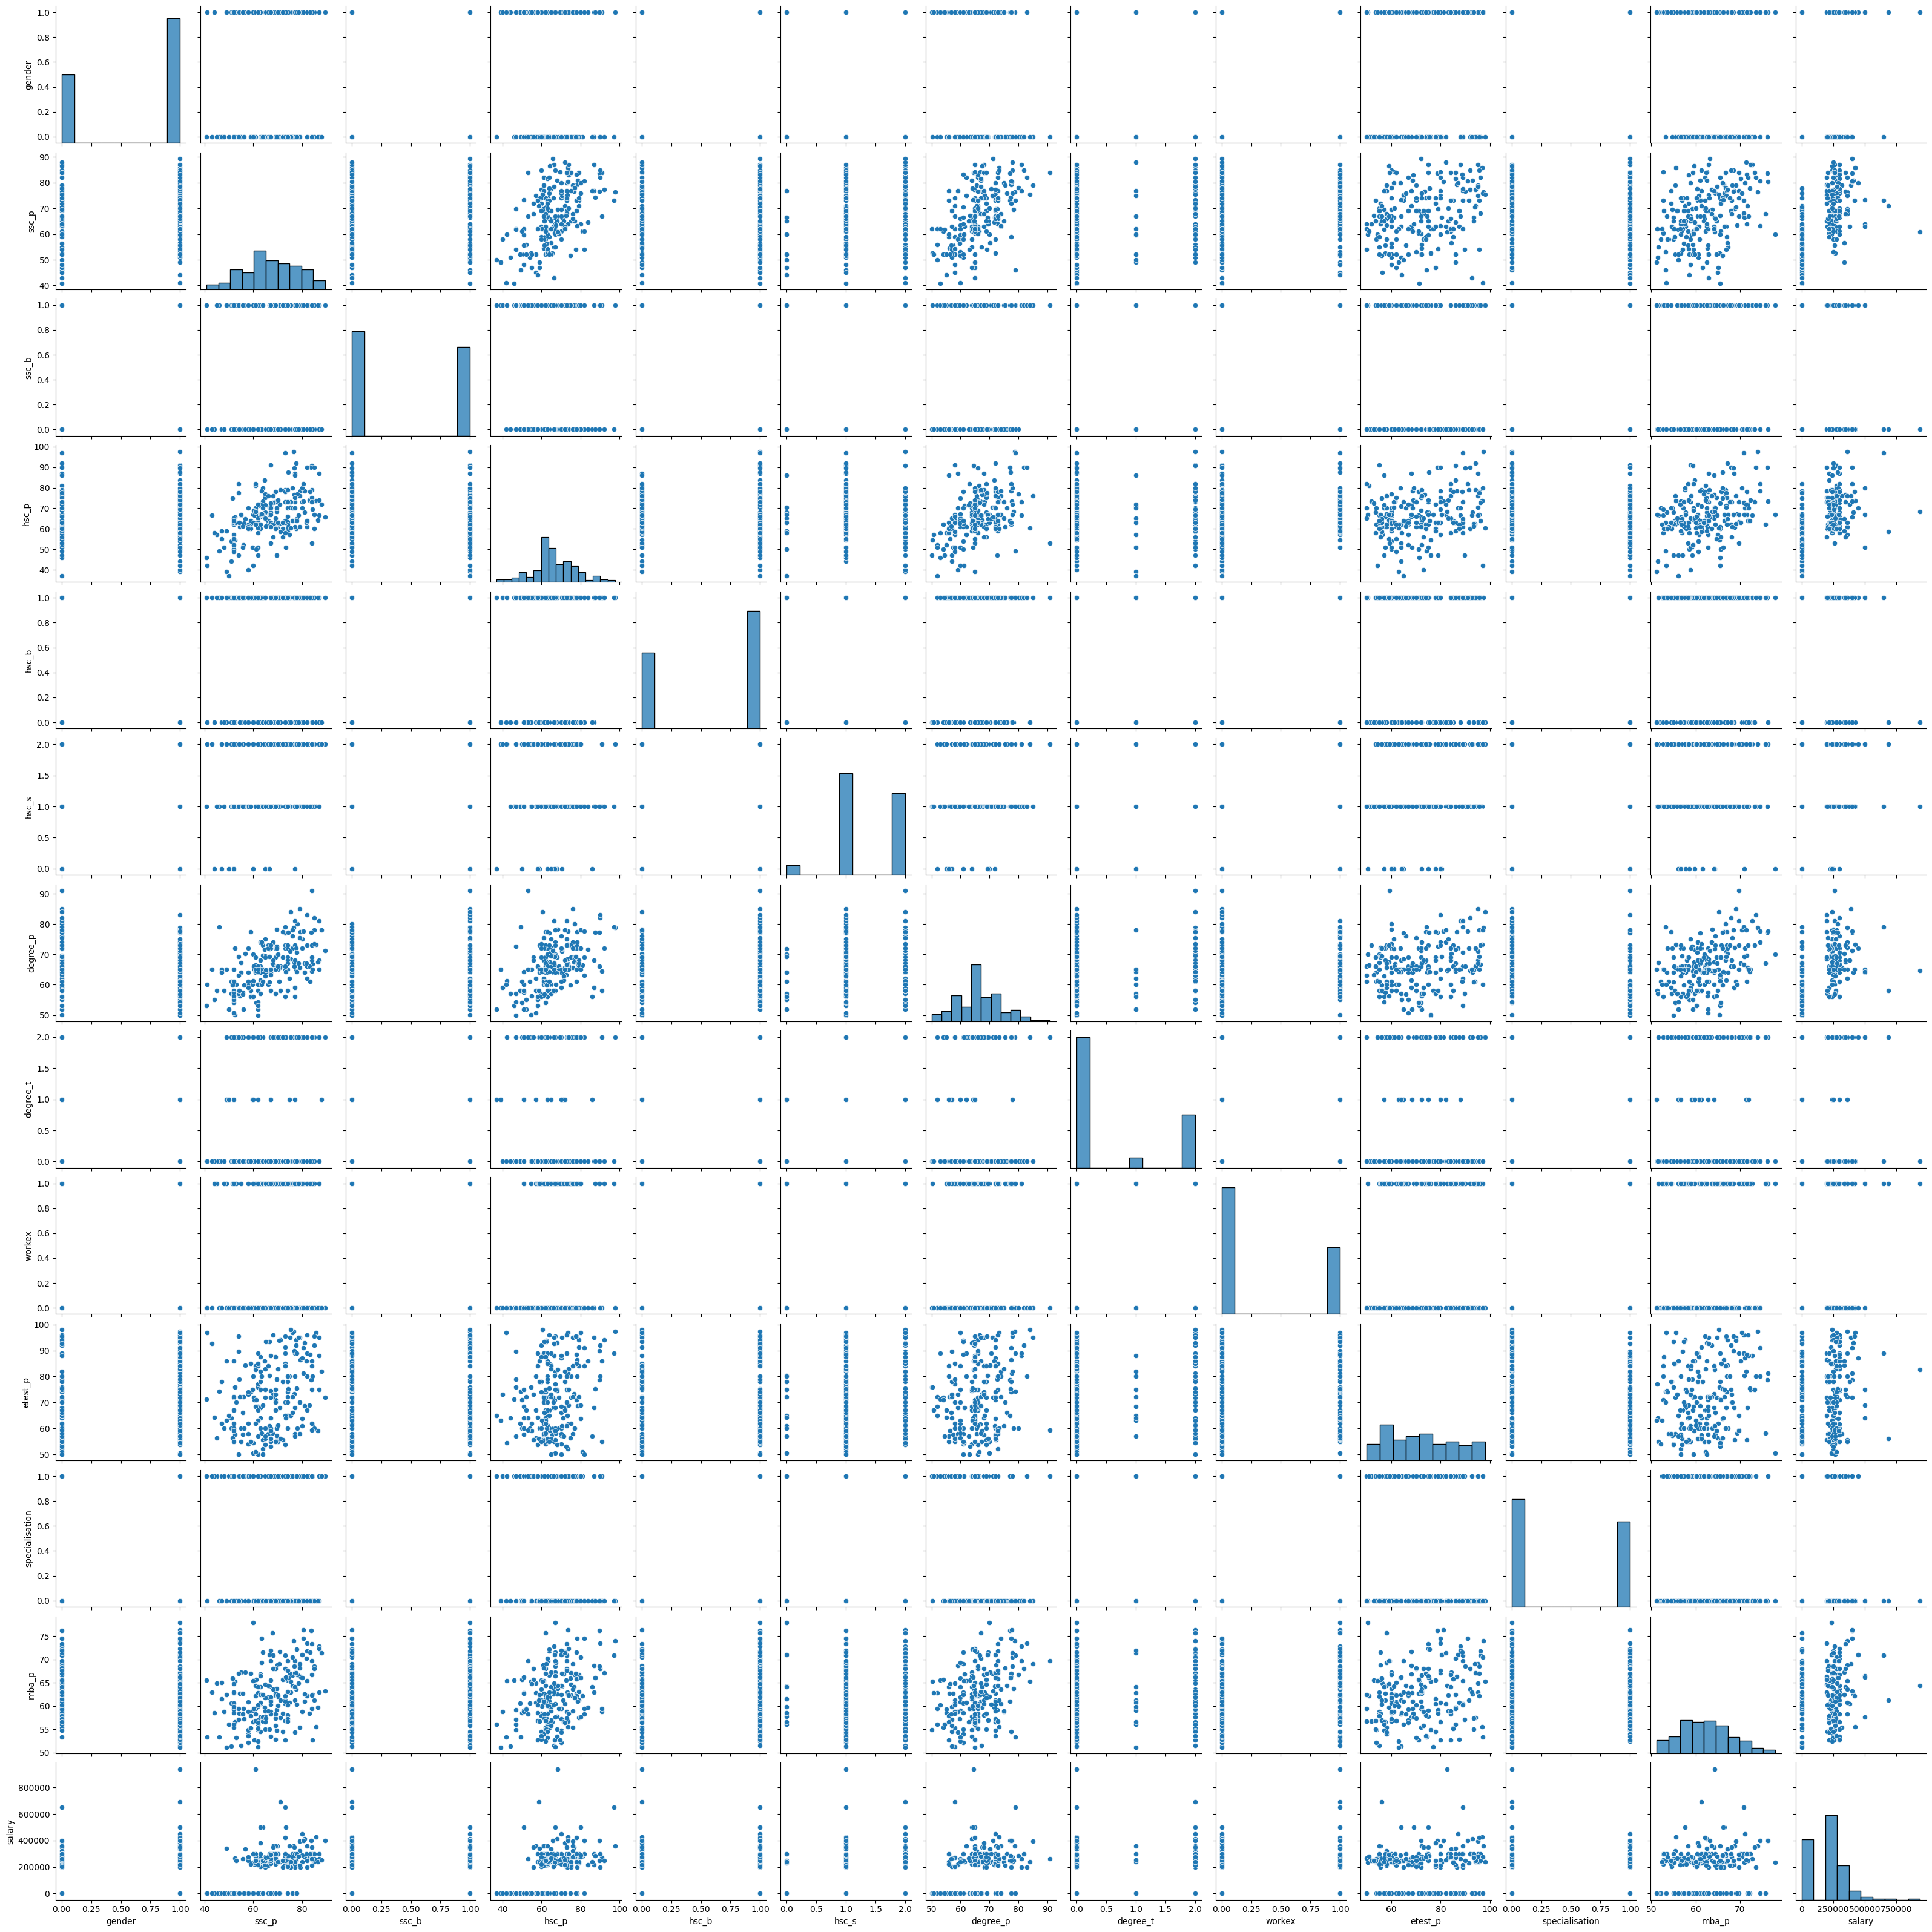

In [227]:
sns.pairplot(dst3)

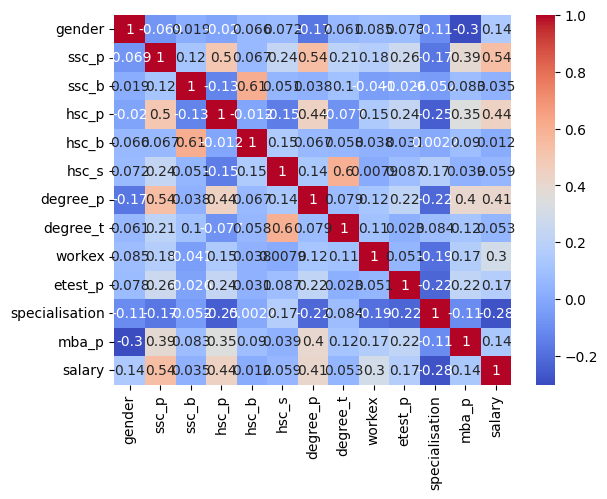

In [228]:
# Compute correlation matrix
corr = dst3.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [230]:
#X = dst3.iloc[:, :-1]
X = dst3[['degree_p','hsc_p','ssc_p','workex','mba_p']]
X.head()

,degree_p,hsc_p,ssc_p,workex,mba_p
0,58.00,91.0,67.00,0,58.80
1,77.48,78.3,79.33,1,66.28
2,64.00,68.0,65.00,0,57.80
3,52.00,52.0,56.00,0,59.43
4,73.30,73.6,85.80,0,55.50


In [231]:
y = dst3.iloc[:, -1]
y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [236]:
model = LinearRegression()

In [237]:
model.fit(X_train, y_train)

LinearRegression()

In [238]:
y_pred = model.predict(X_test)

In [239]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13766214700.822115


In [240]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.3103417271502671
